<a href="https://colab.research.google.com/github/SachinScaler/UnsupervisedML_Feb24/blob/main/PCA_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Digits Dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
X = digits.data
Y = digits.target

In [ ]:
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X.shape #8x8=64

(1797, 64)

-> 100 thousand features
-> Embedding F
-> 100 features

In [ ]:
digits.images.shape # 28 x 28

(1797, 8, 8)

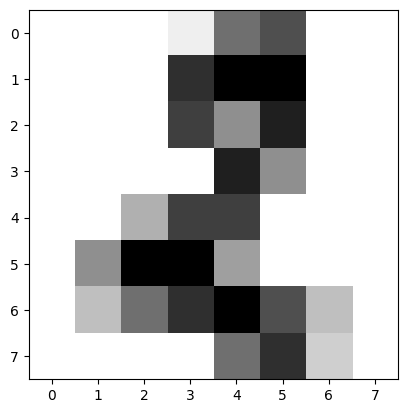

In [ ]:
plt.gray()

random_index = 57

plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r) #------> seems like number 4
plt.show()

In [ ]:
Y[random_index]

2

- PCA to plot and EDA
- ML model on full features

### Eigen Values and Eigen Vectors

In [ ]:
import numpy as np
matrix = np.array([[1,3],
                  [2,-4]])
print(matrix)

[[ 1  3]
 [ 2 -4]]


In [ ]:
np.dot(matrix.T,np.array([3,1]))

array([5, 5])

In [ ]:
np.dot(matrix.T,np.array([2,1]))

array([4, 2])

In [ ]:
eig_val,eig_vectors= np.linalg.eig(matrix)
eig_val

array([ 2., -5.])

In [ ]:
eig_vectors

array([[ 0.9486833 , -0.4472136 ],
       [ 0.31622777,  0.89442719]])

In [ ]:
eig_vectors

array([[ 0.9486833 , -0.4472136 ],
       [ 0.31622777,  0.89442719]])

### PCA FROM SCRATCH

In [ ]:
#!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [ ]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


In [ ]:
data.shape

(20, 2)

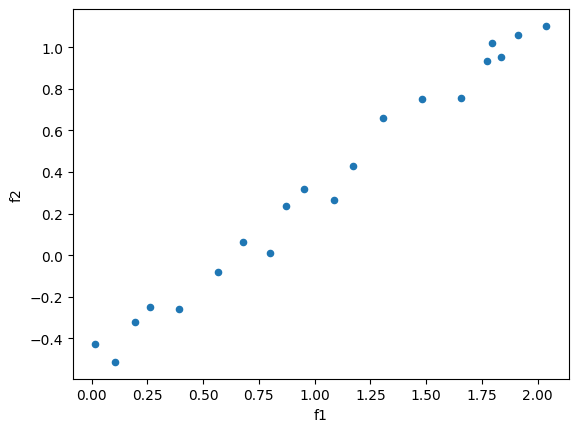

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

- Step 1: Data is Mean Centered(scaled)

In [ ]:
# Step 1: Column standardization
x_data = data['f1'].values
y_data = data['f2'].values


In [ ]:
# calc std
mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

# calc std
std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

In [ ]:
X_st = np.zeros((len(x_data), 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

In [ ]:
# Step 2: Eigenvalue decomposition

# calculate cov
cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data)-1)

eig_val , eig_vec = np.linalg.eig(cov_X_st)
print(eig_val)

[2.09718701 0.00807615]


In [ ]:
eig_vec = eig_vec.T  #  thats how we want them (horizontal)
eig_vec

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
### Step 3: Reduce Dims: eig_vec. (dataset)
X_prime = eig_vec[0].dot(X_st.T)
X_prime_reduced = X_prime

In [ ]:
X_prime_reduced.shape

(20,)

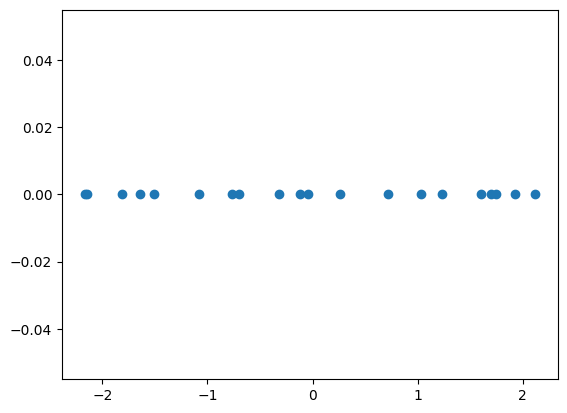

In [ ]:
### Step 4: Visualize the dataset on new axis
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

In [ ]:
eig_val[0]/(eig_val[0]+eig_val[1])

0.9961638305134559

In [ ]:
eig_val[1]/(eig_val[0]+eig_val[1])

0.003836169486543977

Scratch Imp with helpers

[2.09718701 0.00807615]


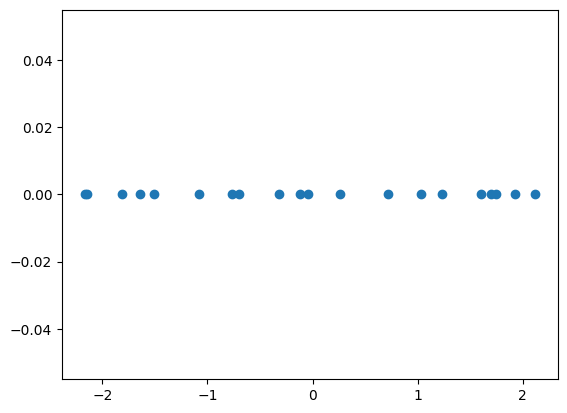

In [ ]:
from sklearn.preprocessing import StandardScaler


# scaling with standard scaaler
data_sc = StandardScaler().fit_transform(data)

# covariance calculated using np.cov: assume that we are calculating the cov of sample
cov = np.cov(data_sc.T)

# lin alg as it is
eigenvalues, eigenvectors = np.linalg.eig(cov)

eigenvectors = eigenvectors.T # We want like this
print(eigenvalues)

X_prime_reduced = eigenvectors[0].dot(data_sc.T)

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

### SKlearn Libarary

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # HOW MANY PC'S I WANT

X_p = pca.fit_transform(data_sc)

In [ ]:
print(pca.explained_variance_) # EIGEN VALUES

[2.09718701 0.00807615]


In [ ]:
pca.explained_variance_ratio_

array([0.99616383, 0.00383617])

### PCA ON DIGITS DATASET

In [ ]:
X = digits.data
Y = digits.target

X.shape, Y.shape

((1797, 64), (1797,))

In [ ]:
Y

array([0, 1, 2, ..., 8, 9, 8])

### Let's try to perform visualzation

In [ ]:
pca_2D = PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)
Z1.shape

(1797, 2)

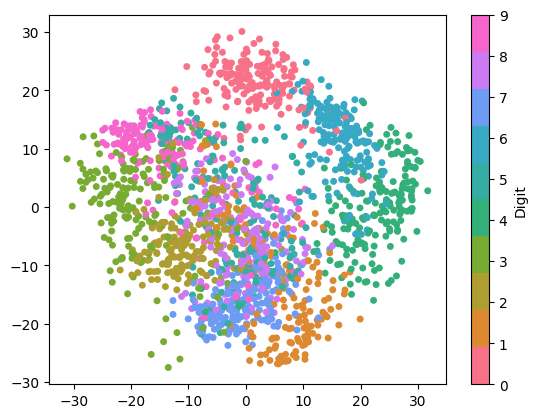

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

fig, ax = plt.subplots()

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')
plt.show()

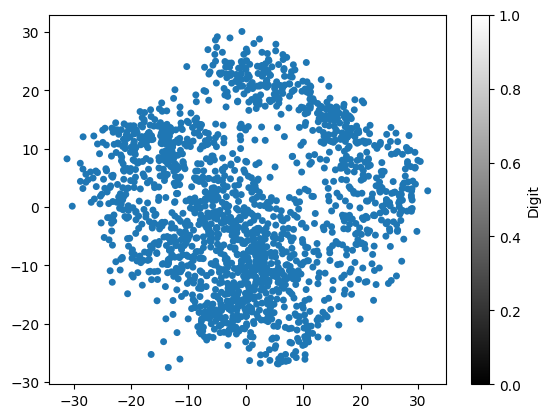

In [ ]:
fig, ax = plt.subplots()

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')
plt.show()

- we lost a lot of info?

In [ ]:
pca_2D.explained_variance_ratio_.sum()

0.2850936482369628

In [ ]:
pca_2D.explained_variance_ratio_

array([0.14890594, 0.13618771])

- 72% INFO IS LOST

#### FIND HOW MANY COMPONENTS WILL WE NEED TO PRESERVE 95%

In [ ]:
pca_2D = PCA(n_components=64)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)
Z1.shape

(1797, 64)

In [ ]:
pca_2D.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [ ]:
np.cumsum(pca_2D.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [ ]:
# 95% info we need 29 components : 64-29=35 dims can be removed with loss of just 5%

### Let's try another DIM REDUCTIOT TECHNIQUE: t- SNE

In [ ]:
from sklearn.manifold import TSNE

z2 = TSNE(n_components=2, random_state=0, perplexity=25).fit_transform(X)

In [ ]:
z2.shape

(1797, 2)

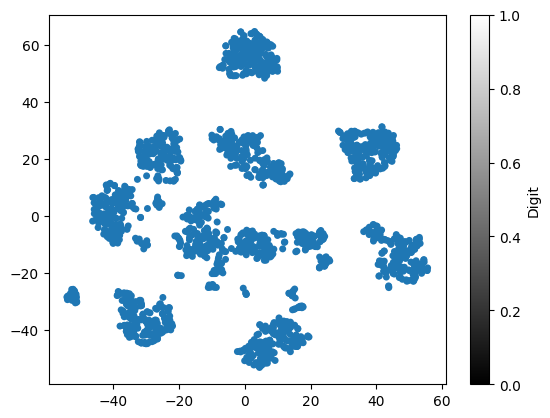

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(z2[:,0], z2[:,1], s=25, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

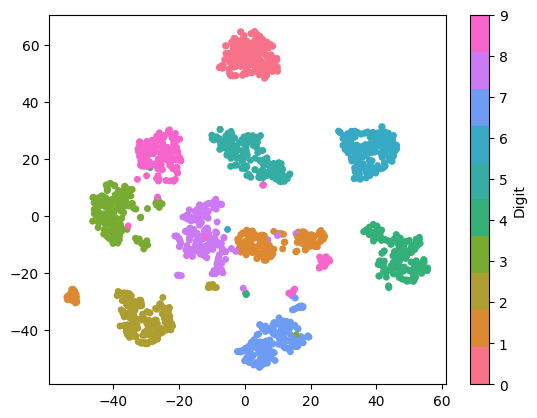

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(z2[:,0], z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

Doubt Solving: Cluster Analysis

In [ ]:
### see how means are changing across different cluster:
### see how spread/variances are changing across different cluster

- custgroup1: spending- 100 dollars
- custgroup2: spending- 1000 dollars